# Desafío-Regularización

### Desafío 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msngo
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, median_absolute_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('winequality-red.csv')

### Desafío 2

#### Tipo de dato por columna

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<AxesSubplot:>

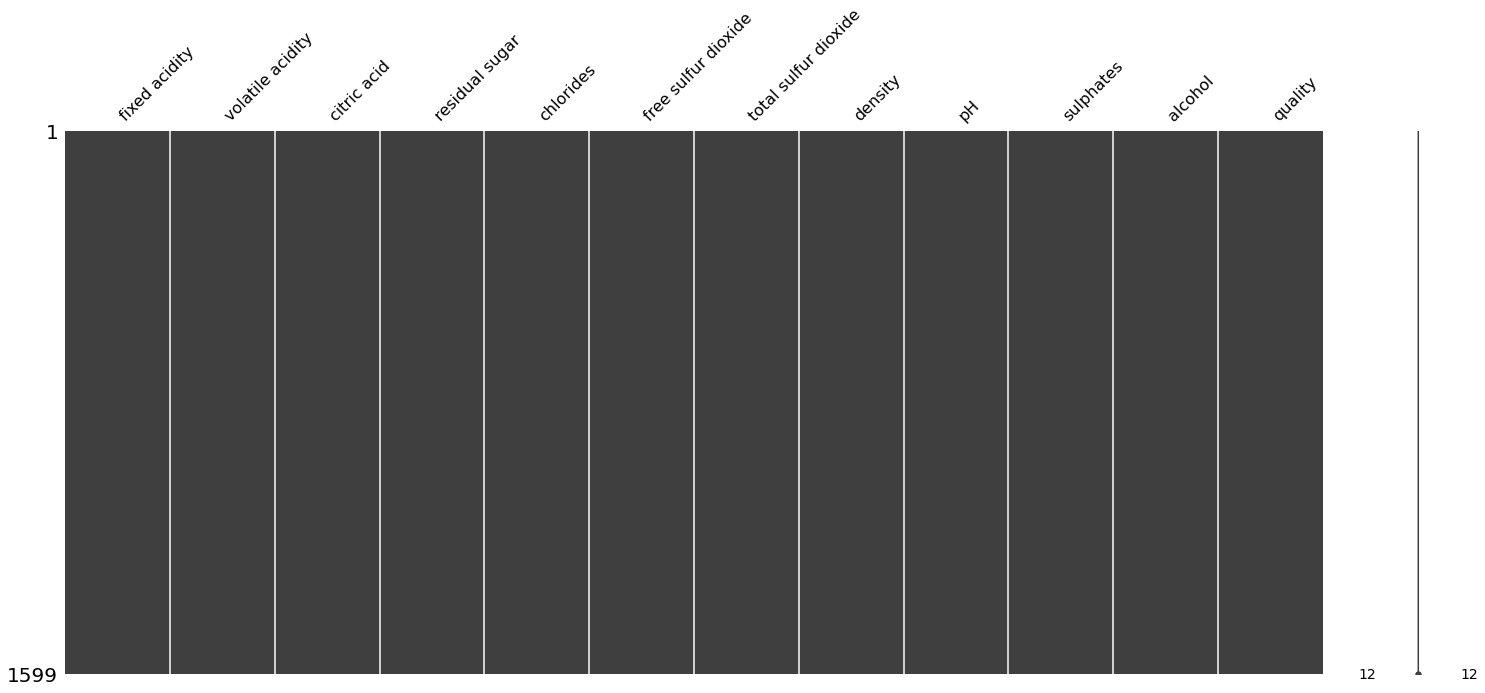

In [5]:
msngo.matrix(df)

No se visualizan datos perdidos en la base de datos

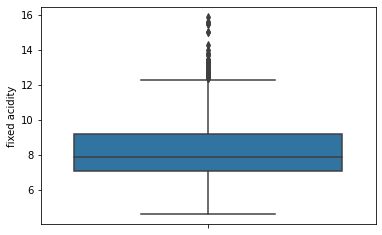

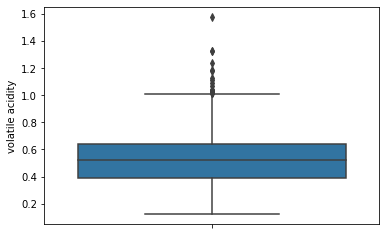

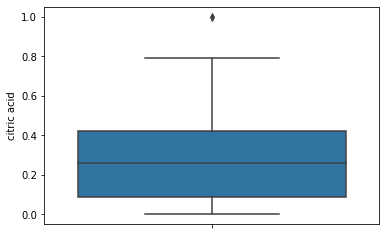

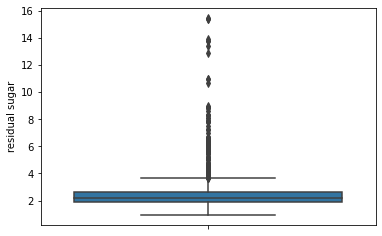

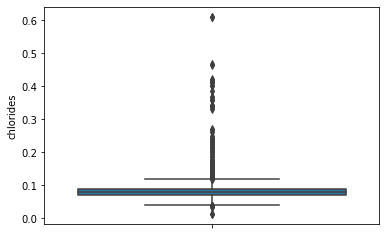

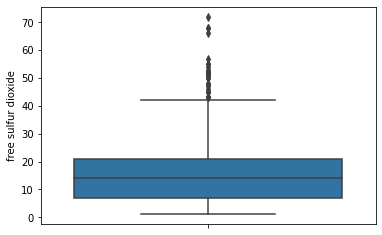

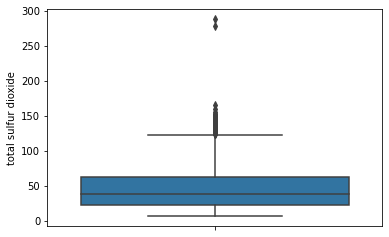

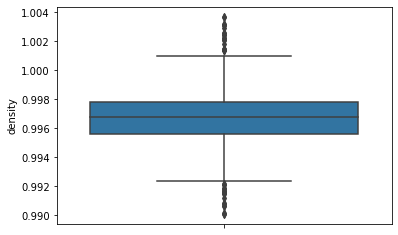

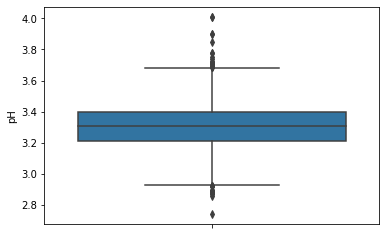

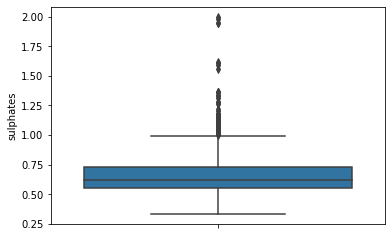

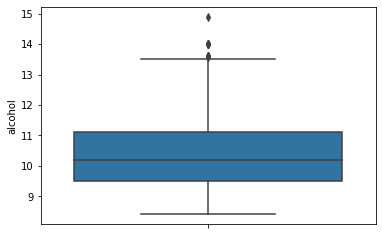

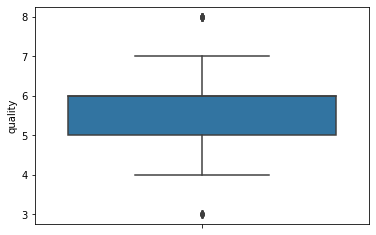

In [6]:
for columna in df.columns:
    sns.boxplot(y=df[columna])
    plt.show()

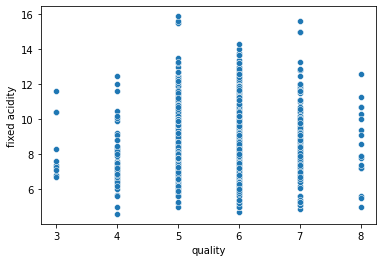

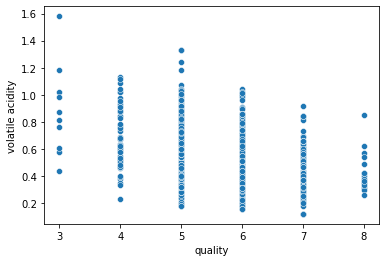

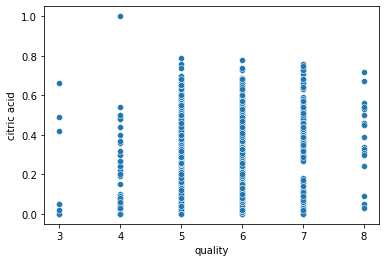

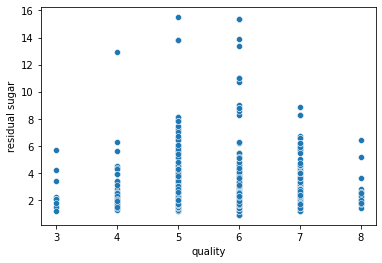

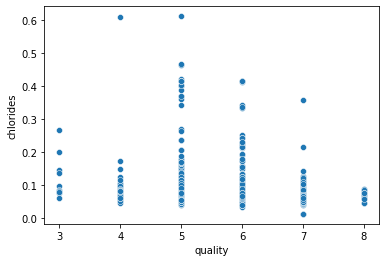

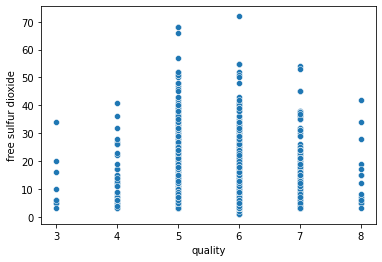

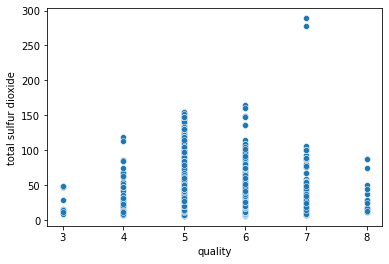

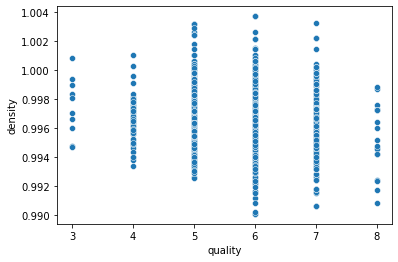

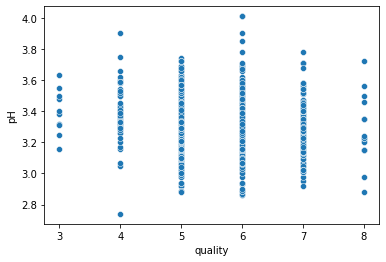

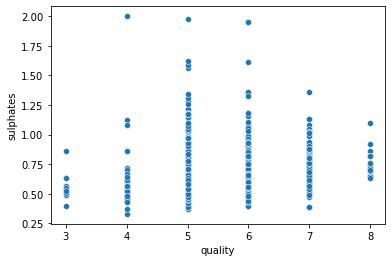

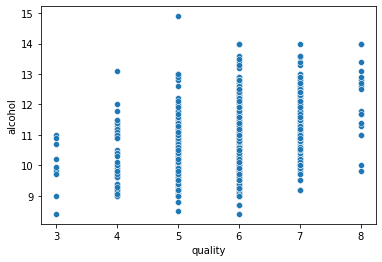

In [7]:
i=0
while i<=10:
    sns.scatterplot(x=df.quality, y = df.columns[i],data=df )
    plt.show()
    i=i+1


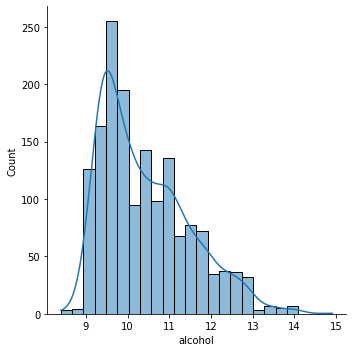

In [8]:
sns.displot(df['alcohol'], kde= True)

### Desafio 3

#### Escalado

In [9]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [11]:
x = df_scaled.iloc[:,:11]
y = df_scaled['alcohol']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state= 1122)

#### Modelo Ridge

In [12]:
ridge_cv = RidgeCV(cv = 10)
model_ridge = ridge_cv.fit(x_train, y_train)

In [13]:
model_ridge.alpha_

0.1

In [14]:
model_ridge.coef_

array([ 2.37584751e-04,  1.91675330e-05,  3.79298272e-05,  1.00839123e-04,
       -1.65623989e-05, -8.38525663e-06, -1.68307745e-05, -2.94549193e-04,
        1.44881628e-04,  5.06795108e-05,  9.99734783e-01])

In [15]:
y_hat_ridge = model_ridge.predict(x_test)

In [16]:
mse_ridge = mean_squared_error(y_test, y_hat_ridge)
mse_ridge 

2.224052482296054e-08

In [17]:
rmse_ridge = np.sqrt(mse_ridge)
rmse_ridge

0.00014913257465409943

In [18]:
mae_ridge = median_absolute_error(y_test, y_hat_ridge)
mae_ridge

9.38098086840089e-05

In [19]:
print(f'El valor del RMSE del modelo regularizado con Ridge es {rmse_ridge}. \nEl valor MAE del modelo regularizado con Ridge es {mae_ridge}')

El valor del RMSE del modelo regularizado con Ridge es 0.00014913257465409943. 
El valor MAE del modelo regularizado con Ridge es 9.38098086840089e-05


In [20]:
mae_ridge<rmse_ridge

True

Significa que el punto equidistante de los errores es inferior a la métrica del error cuadrático
promedio. En esta situación, esperamos tener observaciones atípicas con subestimaciones.
Esta situación puede ocurrir cuando nuestro modelo falla en identificar valores atípicos.
Esperamos tener una mayor concentración en valores altos de la distribución del error.

#### Modelo Lasso

In [21]:
lasso_cv = LassoCV(cv = 10)
model_lasso = lasso_cv.fit(x_train, y_train)

In [22]:
model_lasso.alpha_

0.0009973767668880267

In [23]:
model_lasso.coef_

array([-0.   , -0.   ,  0.   ,  0.   , -0.   , -0.   , -0.   , -0.   ,
        0.   ,  0.   ,  0.999])

In [24]:
y_hat_lasso= model_lasso.predict(x_test)

In [25]:
mse_lasso = mean_squared_error(y_test, y_hat_lasso)

In [26]:
rmse_lasso = np.sqrt(mse_lasso)

In [27]:
mae_lasso = median_absolute_error(y_test, y_hat_lasso)

In [28]:
print(f'El valor del RMSE del modelo regularizado con Lasso es {rmse_lasso}. \nEl valor MAE del modelo regularizado con Lasso es {mae_lasso}')

El valor del RMSE del modelo regularizado con Lasso es 0.0010031868518895189. 
El valor MAE del modelo regularizado con Lasso es 0.0007635347136815129


In [29]:
mae_lasso<rmse_lasso

True

Significa que el punto equidistante de los errores es inferior a la métrica del error cuadrático
promedio. En esta situación, esperamos tener observaciones atípicas con subestimaciones.
Esta situación puede ocurrir cuando nuestro modelo falla en identificar valores atípicos.
Esperamos tener una mayor concentración en valores altos de la distribución del error.

#### Modelo con ElasticNet

In [30]:
elastic_cv = ElasticNetCV(cv = 10)
model_elastic = elastic_cv.fit(x_train, y_train)

In [31]:
model_elastic.alpha_

0.0019947535337760535

In [32]:
model_elastic.coef_

array([-0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -1.25741951e-05,
        0.00000000e+00,  0.00000000e+00,  9.97995713e-01])

In [33]:
y_hat_elastic = model_elastic.predict(x_test)

In [34]:
mse_elastic = mean_squared_error(y_test, y_hat_elastic)

In [35]:
rmse_elastic = np.sqrt(mse_elastic)

In [36]:
mae_elastic = median_absolute_error(y_test, y_hat_elastic)

In [37]:
print(f'El valor del RMSE del modelo regularizado con ElasticNet es {rmse_elastic}. \nEl valor MAE del modelo regularizado con ElasticNet es {mae_elastic}')

El valor del RMSE del modelo regularizado con ElasticNet es 0.0020045586056616385. 
El valor MAE del modelo regularizado con ElasticNet es 0.0015190424173941453


In [38]:
mae_elastic<rmse_elastic

True

Significa que el punto equidistante de los errores es inferior a la métrica del error cuadrático
promedio. En esta situación, esperamos tener observaciones atípicas con subestimaciones.
Esta situación puede ocurrir cuando nuestro modelo falla en identificar valores atípicos.
Esperamos tener una mayor concentración en valores altos de la distribución del error.

***¿Qué modelo presenta un mejor desempeño en base a las métricas?*** 

El modelo que presenta un mejor desempeño es el realizado con regularizacion Lasso, ya que segun las metricas el error entre el valor de predicho y el valor real es el más pequeño.

***¿Qué atributos mantienen un comportamiento similar a lo largo de cada modelo?*** 

No se observan atributos con comportamientos similares entre los modelos.